## descriptive data exploration
* study the trending of correlation

### feature ranking
* correlation btw each feature and unit price
* random forest ranking


In [2]:
%load_ext autoreload
# always reload modules marked with "%aimport"
%autoreload 1

import os,sys
import numpy as np
import pandas as pd

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), '../..', 'src')
sys.path.append(src_dir)

%aimport plot_utils
from plot_utils import *
%aimport preprocessing
from preprocessing import *
%aimport data_source
from data_source import *

In [15]:
ds = DataSource(host='localhost',port=5432, username='postgres', password='', database='sdra')
ds.show_views()
ds.update_views()

df_transaction = ds.get_view_df('property_address_transactions')
df_property = ds.get_view_df('property_addresses')
pp = Preprocess(df_transaction, df_property)

connect to database postgresql://postgres:@localhost:5432/sdra
['properties', 'property_features', 'transactions', 'property_addresses', 'property_address_transactions', 'property_estimate']
execute  c:\wenyan\dse_capstone\database\preprocess.sql


### retrieve the dataset

In [6]:
df_all_valid = pp.dataset(valid=True)
print('all dataset', df_all_valid.shape)
# last year transactions of valid properties
df_last_year_valid = pp.dataset(valid=True, date=('2016-10-01', '2017-10-01'))
print('last year', df_last_year_valid.shape)

transforming view
transforming pool
transforming date
transforming year_built
transforming sold_year
transforming sold_age
making sqft_zip_avg
making sqft_price_zip_avg
making sold_price_zip_avg
making sale_count_zip
making prop_count_zip


(37881, 18)

### correlation between features and target(sqft_price)
* with geography: street, zip, city
* with property characteristic: sqft, lot_size_sqft

In [10]:
features = set(pp.get_feature_list('all')) - set(['date', 'street', 'zip', 'sold_year', 'sqft_price']) # exclude features not suitable
features -= set(['year_built'])   # features under work

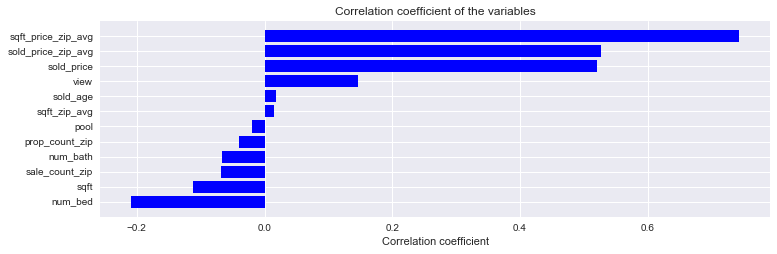

{'num_bath': -0.06595869161024491,
 'num_bed': -0.20961935904804133,
 'pool': -0.019426027608156499,
 'prop_count_zip': -0.040320717873232853,
 'sale_count_zip': -0.067981792211333644,
 'sold_age': 0.01804903040165293,
 'sold_price': 0.52070206177358269,
 'sold_price_zip_avg': 0.52739438548844475,
 'sqft': -0.11262337737728985,
 'sqft_price_zip_avg': 0.74378014598476005,
 'sqft_zip_avg': 0.015230719868655962,
 'view': 0.14640347896467282}

In [11]:
plot_correlation(df_last_year_valid, 'sqft_price', features)

### correlation matrix of delivered features

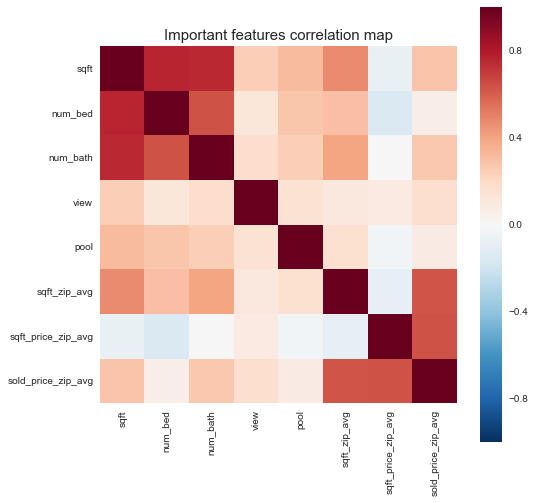

In [14]:
corr_features = list(features)
corr_features = pp.get_feature_list()
corrmat = df_last_year_valid[corr_features].corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important features correlation map", fontsize=15)
plt.show()